In [1]:
using PyPlot, SpecialFunctions, SparseArrays, StatsBase, Optim, JLD2, BenchmarkTools;
include("HenryLib.jl");

In [6]:
besselk((3-2)/2, 0.1)

3.58616683879726

In [3]:
nu = (3-2)/2
gamma(nu)/(2^(nu+1))

0.6266570686577501

0.001
0.004472135954999579
0.01


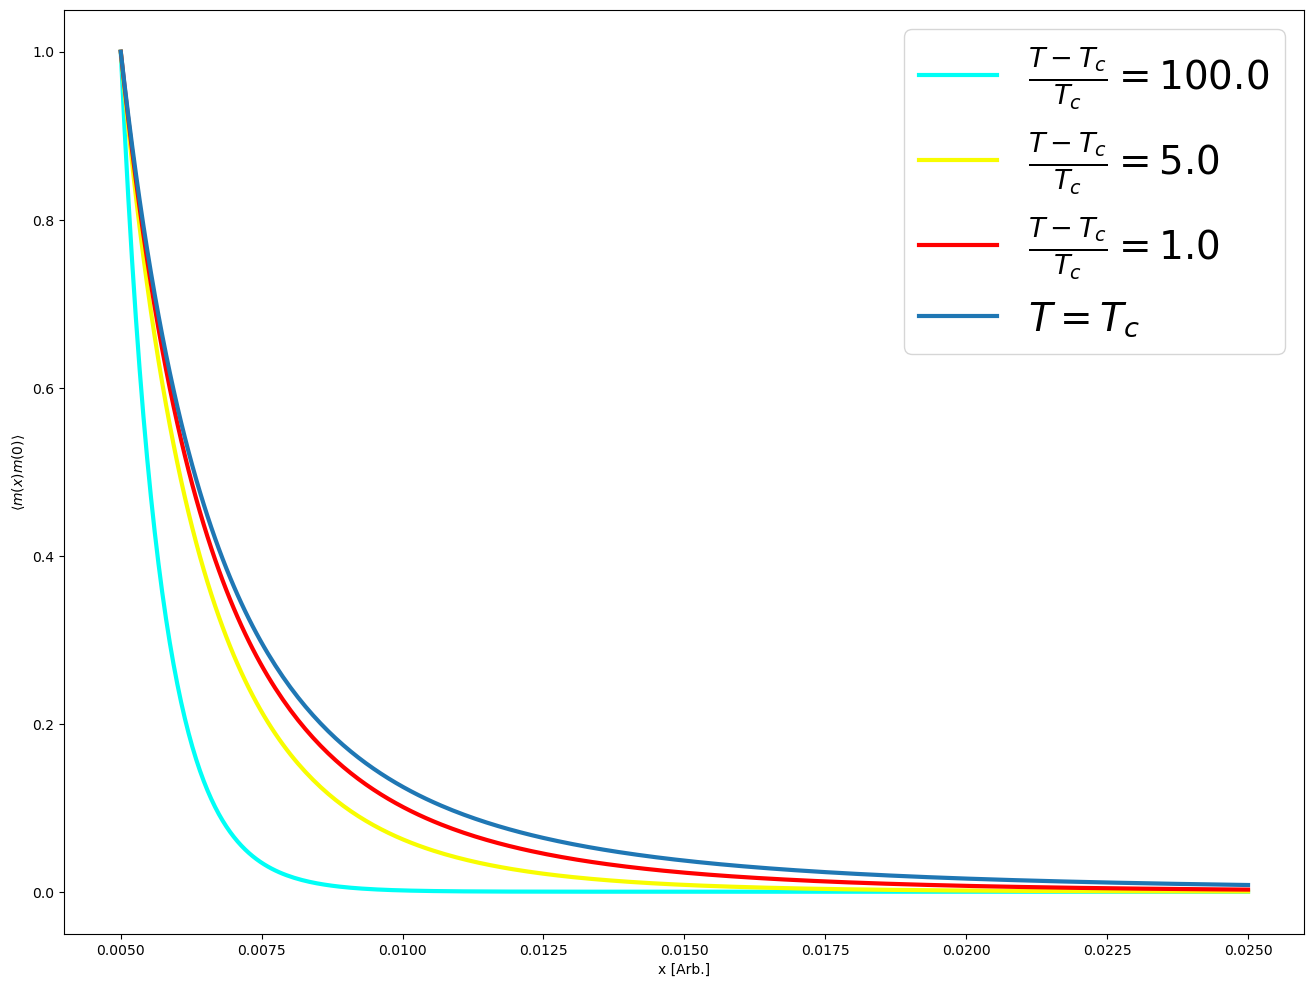

In [4]:
xmin = 0.005
x = LinRange(xmin,0.025,300)
t1 = [100.0, 5.0, 1.0]
d=5
cm = get_cmap(:hsv)
figure(figsize=(16,12))
for t in t1
    xi = 0.01/sqrt(t)
    println(xi)
    norm = besselk((d-2)/2, xmin/xi)*(2*pi*xmin*xi)^((2-d)/2)
    # println(norm)
    G = besselk.((d-2)/2, x/xi).*(2*pi*x*xi).^((2-d)/2)
    G = G/norm
    # axvline(x=xi, color=cm(0.5*log(t)/log(t1[1])), linestyle="dashed")
    plot(x, G, label="\$\\frac{T-T_c}{T_c}=$(t)\$", color=cm(0.5*log(t)/log(t1[1])), linewidth=3)
end
nu = (d-2)/2
norm = gamma(nu)/(2*(2*pi)^(2*nu))*(xmin)^(2-d)
G = gamma(nu)/(2*(2*pi)^(2*nu))*x.^(2-d)
plot(x, G/norm, label="\$T=T_c\$", linewidth=3)
legend(fontsize=28)
xlabel("x [Arb.]")
ylabel("\$\\langle m(x)m(0) \\rangle\$")
PyPlot.display_figs()

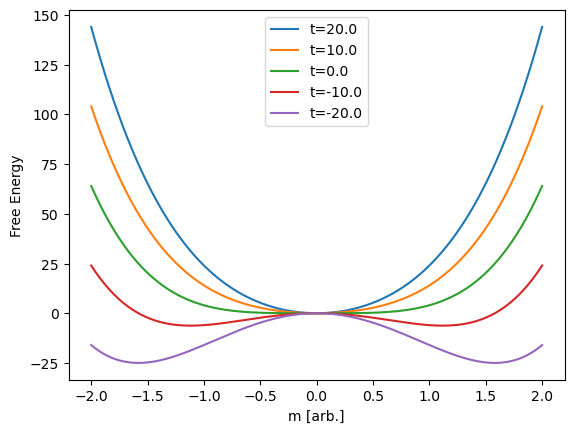

In [5]:
m = LinRange(-2.0, 2.0, 300)
ts = [20.0, 10.0, 0.0, -10.0, -20.0]
u = 4.0
for t in ts
    E = t*m.^2 + u*m.^4
    plot(m, E, label="t=$(t)")
end
xlabel("m [arb.]")
ylabel("Free Energy")
legend()
PyPlot.display_figs()